### Opis danych we wszystkich plikach
- 'age', - wiek klienta
- 'account_name', - imie klienta
- 'account_surname', - nazwisko klienta
- 'product', - produkt
- 'order_city', - miasto z ktorego zlozono zamowienie
- 'color', - kolor produktu
- 'date', - data produkcji
- 'delivery_date', - data dostarczenia
- 'production_date', - data zamowienia
- 'discount', - upust %
- 'ordered', - ilosc zamowiona
- 'quantity', - ilosc dostarczona 
- 'Invoice_Id', - numer faktury, klucz
- 'region', - region
- 'additional_delivery_cost', - oznaczenie typu dostawy i kosztu dostawy
- 'wrh_city', - relacja magazyn z ktorego wyslano towar i destynacja zamowienia
- 'price' - cena
- 'City' - miasto
- 'Zone' - region
---
'additional_delivery_cost'
- T - truck - koszt na sztuke dostarczona (0.15 per sztuka)
- C - container - koszt na sztuke zadeklarowana/zamowiona (0.11 per sztuka)
- F - flight - koszt na sztuke dostarczona (0.82 per sztuka)
- ? - brak danych


**1. Zaimportuj potrzebne biblioteki**

In [1]:
import pandas as pd
import pyarrow
import openpyxl

**2. Zaimportuj dane**

Zaimportuj dane z plikow:
- ZadaniaDf1 - csv
- ZadaniaDf2.parquet - parquet
- ZadaniaDf3 - txt
- ZadaniaDf4 - xlsx

Nazwy DataFrameow powinny miec odpowiednio nazwy df1,df2,df3,df4
Dane powinny być zaimportowane w taki sposób aby kolumny posiadaly odpowiednie nazwy oraz unikalny indeks na poczatku

In [2]:
df1=pd.read_csv(r"C:\Users\michal.zycki\OneDrive - summ-it s.a\Desktop\BigData\Zajecia2\ZadaniaDf1.csv"
               ,sep="/"
               )
df2=pd.read_parquet(r"C:\Users\michal.zycki\OneDrive - summ-it s.a\Desktop\BigData\Zajecia2\ZadaniaDf2.parquet"
                   ,use_nullable_dtypes=True
                   ,engine="pyarrow")
df3=pd.read_csv(r"C:\Users\michal.zycki\OneDrive - summ-it s.a\Desktop\BigData\Zajecia2\ZadaniaDf3.txt"
               ,sep=" ")
df4=pd.read_excel(r"C:\Users\michal.zycki\OneDrive - summ-it s.a\Desktop\BigData\Zajecia2\ZadaniaDf4.xlsx")

**3. Dokonaj rewizji danych**

Dokonaj wstępnej rewizji każdego DataFrameu:
- Przejrzyj kilka pierwszych i ostatnich rekordow kazdego zestawu danych
- Zweryfikuj czy w danych pojawiaja sie nulle oraz ile ich jest
- Zidentyfikuj ewentualne klucze w celu polaczenia zestawow
- Zidentyfikuj czy dane sie duplikuja

In [3]:
print(df1.info(null_counts=True))
print(df2.info(null_counts=True))
print(df3.info(null_counts=True))
print(df4.info(null_counts=True))

C:\Users\michal.zycki\AppData\Local\Temp\ipykernel_27268\1365869062.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(df1.info(null_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Invoice_Id       5000000 non-null  object
 1   account_name     4772470 non-null  object
 2   account_surname  4231219 non-null  object
 3   age              5000000 non-null  int64 
 4   product          4443677 non-null  object
 5   order_city       4688008 non-null  object
 6   color            5000000 non-null  object
 7   date             5000000 non-null  object
 8   delivery_date    5000000 non-null  object
 9   production_date  5000000 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 381.5+ MB
None


C:\Users\michal.zycki\AppData\Local\Temp\ipykernel_27268\1365869062.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(df2.info(null_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 9 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   account_name              5000000 non-null  string
 1   account_surname           5000000 non-null  string
 2   Invoice_Id                5000000 non-null  string
 3   discount                  5000000 non-null  string
 4   ordered                   5000000 non-null  Int32 
 5   quantity                  5000000 non-null  Int32 
 6   region                    5000000 non-null  string
 7   additional_delivery_cost  5000000 non-null  string
 8   wrh_city                  5000000 non-null  string
dtypes: Int32(2), string(7)
memory usage: 314.7 MB
None


C:\Users\michal.zycki\AppData\Local\Temp\ipykernel_27268\1365869062.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(df3.info(null_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 8 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Invoice_Id                5000000 non-null  object 
 1   discount                  3999612 non-null  float64
 2   ordered                   5000000 non-null  int64  
 3   quantity                  5000000 non-null  int64  
 4   region                    0 non-null        float64
 5   additional_delivery_cost  5000000 non-null  object 
 6   wrh_city                  5000000 non-null  object 
 7   price                     5000000 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 305.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    15 non-null     object
 1   Zone    15 non-null     object
dty

C:\Users\michal.zycki\AppData\Local\Temp\ipykernel_27268\1365869062.py:4: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(df4.info(null_counts=True))


In [4]:
df1.head(3)

,Invoice_Id,account_name,account_surname,age,product,order_city,color,date,delivery_date,production_date
0,Invoice: 1A,Patricia,Old_Clifford,28,NaN,Stockholm,black,2014-09-10,2014-09-25,20140908
1,Invoice: 2A,John,Luciano,31,Prod C,Palermo,orange,2010-11-29,2010-11-30,20101125
2,Invoice: 3A,Elizabeth,Clifford,32,NaN,Nairobi,indigo,2010-05-30,2010-06-09,20100529


In [5]:
df2.tail(3)

,account_name,account_surname,Invoice_Id,discount,ordered,quantity,region,additional_delivery_cost,wrh_city
4999997,MarY,Luciano,Invoice: 4999998A,0.1,30,11,,TF,Wroclaw_Tokyo
4999998,RobeRT,,Invoice: 4999999A,,67,51,,T,Krakow_Moscow
4999999,Jennifer,Hawkins,Invoice: 5000000A,0.3,95,82,,TF,Poznan_Nairobi


In [6]:
df2.head(3)

,account_name,account_surname,Invoice_Id,discount,ordered,quantity,region,additional_delivery_cost,wrh_city
0,Patricia,Old_Clifford,Invoice: 1A,0.2,19,16,,T,Poznan_Stockholm
1,John,Luciano,Invoice: 2A,0.1,56,37,,T,Krakow_Palermo
2,Elizabeth,Clifford,Invoice: 3A,0.4,37,23,,TF,Poznan_Nairobi


In [7]:
df2.tail(3)

,account_name,account_surname,Invoice_Id,discount,ordered,quantity,region,additional_delivery_cost,wrh_city
4999997,MarY,Luciano,Invoice: 4999998A,0.1,30,11,,TF,Wroclaw_Tokyo
4999998,RobeRT,,Invoice: 4999999A,,67,51,,T,Krakow_Moscow
4999999,Jennifer,Hawkins,Invoice: 5000000A,0.3,95,82,,TF,Poznan_Nairobi


In [8]:
df3.head(3)

,Invoice_Id,discount,ordered,quantity,region,additional_delivery_cost,wrh_city,price
0,Invoice: 1A,0.2,19,16,NaN,T,Poznan_Stockholm,99
1,Invoice: 2A,0.1,56,37,NaN,T,Krakow_Palermo,7
2,Invoice: 3A,0.4,37,23,NaN,TF,Poznan_Nairobi,99


In [9]:
df3.tail(3)

,Invoice_Id,discount,ordered,quantity,region,additional_delivery_cost,wrh_city,price
4999997,Invoice: 4999998A,0.1,30,11,NaN,TF,Wroclaw_Tokyo,9
4999998,Invoice: 4999999A,NaN,67,51,NaN,T,Krakow_Moscow,9
4999999,Invoice: 5000000A,0.3,95,82,NaN,TF,Poznan_Nairobi,5


In [10]:
df4.head(3)

,City,Zone
0,Stockholm,Europe
1,Denver,America
2,Moscow,Asia


In [11]:
df4.tail(4)

,City,Zone
11,Bogotá,America
12,Manila,Asia
13,Madrid,Europe
14,Milwaukee,America


In [12]:
# W df2 replikuja sie kolumny "account_name" i "account_surname"
# W df3 replikuja sie kolumny "discount", "ordered","quantity","region","additional_delivery_cost" i "wrh_city"
# Kluczami polaczenia beda odpowiednio "Invoice_Id" oraz "order_city" i "City" 
# Kolumny z pustymi wartosciami nad uzupelnieniem trzeba bedzie sie zastanowic to "account_name", "account_surname", "product", "order_city","discount","region"

In [13]:
df2["discount"].value_counts()

0.1    1000789
0.2    1000448
       1000388
0.4    1000050
0.3     998325
Name: discount, dtype: Int64

**4. Nadpisz datasety**
- Nadpisz wszystkie datasety tak aby posiadaly wylacznie unikalne kolumny (brak duplikatow - nalezy wybrac kolumny albo zastosowac drop). 
- Pamietaj aby nie usunac kolumn ktore sa zidentyfikowane jako klucze. 
- Nadaj prefix "u_" dla kazdego datasetu. Nawet jesli dataset nie jest redukowany powinien otrzymac prefix.

In [14]:
u_df1 = df1
u_df2 = df2.drop(columns=["account_name","account_surname"])
u_df3 = df3.drop(columns=["discount", "ordered","quantity","region","additional_delivery_cost","wrh_city"])
u_df4 = df4

**5. Polacz datasety**
- Polacz ze soba datasety. 
- Dolaczaj do siebie datasety df1 do df2 etc. Kazde kolejne polaczenie nadpisuje pod nazwa "u_df1_merge". 
- Po skonczonych polaczeniach usun niepotrzebne kolumny "City" i zapisz dataset jako "merged_df"

In [15]:
u_df1_merge = u_df1.merge(right=u_df2,how="left",left_on="Invoice_Id",right_on="Invoice_Id")

In [16]:
u_df1_merge= u_df1_merge.merge(right=u_df3,how="left",left_on="Invoice_Id",right_on="Invoice_Id")

In [17]:
u_df1_merge= u_df1_merge.merge(right=u_df4[["City","Zone"]],how="left",left_on="order_city",right_on="City")

In [18]:
merged_df=u_df1_merge.drop(columns="City")

**6. Zapisz dane do pliku, wykonaj ponowna analize danych i pogleb ja**
- Zapisz dane do pliku .csv pod nazwa "merged_df". 
- Zrestartuj kernel aby zwolnic pamiec ram. 
- Odczytaj zapisany wczesniej plik i dokonaj jego analizy, sprawdz czy wczesniej ustalone kolumny z pustymi wartosciami sa takie same czy cos sie zmienilo
- Wstepna wizualizacja danych przy tak duzej ilosci danych moze byc nieskuteczna/nieczytelna. Dlatego poleca sie zweryfikowac unikalne wartosci dla kazdej z kolumn. W przypadku ograniczenia widocznosci poleca sie przekonwertowac dane na liste.
- Mozna pominac klucz po ktorym laczono dane poniewaz jest unikalny 

In [19]:
merged_df.to_csv(r"C:\Users\michal.zycki\OneDrive - summ-it s.a\Desktop\BigData\Zajecia2\merged_df.csv",index=False)

In [20]:
merged_df = pd.read_csv(r"C:\Users\michal.zycki\OneDrive - summ-it s.a\Desktop\BigData\Zajecia2\merged_df.csv")
merged_df.info(null_counts=True)

C:\Users\michal.zycki\AppData\Local\Temp\ipykernel_27268\3614383788.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  merged_df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Invoice_Id                5000000 non-null  object 
 1   account_name              4772470 non-null  object 
 2   account_surname           4231219 non-null  object 
 3   age                       5000000 non-null  int64  
 4   product                   4443677 non-null  object 
 5   order_city                4688008 non-null  object 
 6   color                     5000000 non-null  object 
 7   date                      5000000 non-null  object 
 8   delivery_date             5000000 non-null  object 
 9   production_date           5000000 non-null  int64  
 10  discount                  3999612 non-null  float64
 11  ordered                   5000000 non-null  int64  
 12  quantity                  5000000 non-null  int64  
 13  region                    0

In [21]:
merged_df["account_name"].unique()

array(['Patricia', 'John', 'Elizabeth', 'Robert', 'patricia', 'Ahmed',
       'Salomon', 'Jennifer', 'James', nan, 'Richard', 'RobeRT',
       'William', 'Juan Luis', 'JohN', 'Mary', 'Michael', 'MarY', 'Linda',
       'Barbara', 'james', 'Susan'], dtype=object)

In [22]:
merged_df["account_surname"].unique()

array(['Old_Clifford', 'Luciano', 'Clifford', 'Vallllentine', 'Peroni',
       'Old_Robust', 'Robust', 'Ellen', nan, 'Hawkins', 'Vallentine',
       'Nici'], dtype=object)

In [23]:
merged_df["age"].unique()

array([ 28,  31,  32,  25,  47,  63,  38,  42,  26,  43,  40, 310,  44,
       520,  56,  39,  54,  62,  36,  46,  51,  55,  29, 340,  64,  49,
        48,  33,  59,  57,  34,  27,  35,  37, 270,  52,  50,  61, 330,
        45, 420, 470,  41, 450, 550,  60, 620,  30, 490,  53, 380, 630,
       410, 530,  58, 560, 510, 440, 300, 290, 350, 390, 260, 460, 280,
       370, 250, 570, 610, 500, 400, 590, 360, 480, 540, 320, 430, 580,
       600, 640], dtype=int64)

In [24]:
merged_df["product"].unique()

array([nan, 'Prod C', 'Prod D', 'Prod A', 'Prod E', 'Prod G', 'Prod F',
       'Prod B', 'Prod H'], dtype=object)

In [25]:
merged_df["order_city"].unique()

array(['Stockholm', 'Palermo', 'Nairobi', nan, 'Marseille', 'Denver',
       'Oslo', 'Madrid', 'Tokyo', 'Milwaukee', 'Berlin', 'Lisbon',
       'Manila', 'Bogotá', 'Río de Janeiro', 'Moscow'], dtype=object)

In [26]:
merged_df["color"].unique()

array(['black', 'orange', 'indigo', 'green', 'pink', 'brown', 'white',
       'purple', 'yellow', 'gold', 'blue', 'grey', 'beige', 'red',
       'silver'], dtype=object)

In [27]:
print(list(merged_df["date"].unique()))

['2014-09-10', '2010-11-29', '2010-05-30', '2017-02-01', '2017-01-29', '2011-10-04', '2012-12-12', '2015-05-26', '2017-04-16', '2018-01-17', '2015-06-02', '2011-07-13', '2016-10-08', '2014-03-05', '2014-04-20', '2015-05-22', '2013-06-06', '2010-12-27', '2011-04-16', '2010-08-02', '2010-03-05', '2017-06-13', '2012-09-24', '2013-08-05', '2011-12-13', '2011-12-18', '2015-01-04', '2011-12-22', '2012-03-21', '2014-01-14', '2010-10-02', '2015-01-24', '2010-06-07', '2015-06-26', '2016-08-29', '2016-06-21', '2014-05-22', '2010-02-22', '2011-08-01', '2016-04-15', '2013-03-22', '2011-04-17', '2012-02-07', '2017-09-26', '2011-01-21', '2016-02-15', '2012-08-03', '2012-02-05', '2013-04-11', '2014-05-21', '2015-06-17', '2012-04-12', '2014-07-23', '2014-06-27', '2015-07-03', '2015-08-21', '2015-11-03', '2014-06-23', '2014-03-22', '2014-10-25', '2010-10-12', '2017-03-20', '2013-10-25', '2011-02-12', '2016-12-15', '2017-06-05', '2014-07-08', '2011-01-05', '2011-07-22', '2011-07-06', '2015-09-26', '2017

In [28]:
print(list(merged_df["delivery_date"].unique()))

['2014-09-25', '2010-11-30', '2010-06-09', '2017-02-05', '2017-02-13', '2011-10-05', '2012-12-18', '2015-05-31', '2017-05-03', '2018-01-21', '2015-06-04', '2011-07-23', '2016-10-15', '2014-03-17', '2014-05-06', '2013-06-15', '2011-01-09', '2011-04-28', '2010-08-07', '2010-03-12', '2017-06-23', '2012-10-03', '2013-08-21', '2011-12-23', '2011-12-24', '2015-01-05', '2011-12-28', '2012-04-04', '2014-01-15', '2010-10-02', '2015-02-12', '2010-06-23', '2015-07-15', '2016-09-12', '2016-06-22', '2014-06-10', '2010-02-25', '2011-08-12', '2016-05-04', '2013-03-30', '2011-04-25', '2012-02-17', '2017-10-07', '2011-01-25', '2016-02-24', '2012-08-08', '2012-02-23', '2013-04-28', '2014-05-26', '2015-06-18', '2012-04-14', '2014-08-06', '2014-06-29', '2015-07-23', '2015-09-03', '2015-11-07', '2014-03-23', '2014-10-28', '2010-10-23', '2017-03-25', '2013-11-06', '2011-02-12', '2016-12-15', '2017-06-14', '2014-07-09', '2017-06-16', '2011-01-16', '2011-07-30', '2011-07-13', '2015-10-12', '2017-03-23', '2016

In [29]:
print(list(merged_df["production_date"].unique()))

[20140908, 20101125, 20100529, 20170129, 20170127, 20111002, 20121206, 20150517, 20170408, 20180107, 20150528, 20110701, 20160928, 20140225, 20140418, 20150510, 20130530, 20101225, 20110413, 20100801, 20100227, 20170606, 20120920, 20130723, 20111212, 20111209, 20150104, 20111222, 20120310, 20140101, 20100926, 20150117, 20100601, 20150615, 20160829, 20160612, 20140521, 20100219, 20110720, 20160402, 20130317, 20110410, 20120205, 20170922, 20110112, 20160207, 20120802, 20120128, 20130411, 20140516, 20150612, 20120401, 20140710, 20140627, 20150630, 20150811, 20151102, 20140610, 20140315, 20141015, 20101008, 20170307, 20131020, 20110210, 20161212, 20170525, 20170605, 20101229, 20110710, 20110630, 20150918, 20170225, 20160819, 20120622, 20170422, 20100308, 20121005, 20160909, 20180219, 20140320, 20170118, 20101201, 20101113, 20100723, 20100902, 20161022, 20180102, 20160203, 20160628, 20140815, 20160129, 20151107, 20120606, 20110603, 20160416, 20101124, 20180121, 20110918, 20100407, 20110522,

In [39]:
merged_df["discount"].unique()

array([0.2, 0.1, 0.4, nan, 0.3])

In [40]:
merged_df["ordered"].unique()

array([19, 56, 37, 14, 12, 16, 28, 94, 55, 74, 47, 62, 49, 95, 70, 41, 69,
       80, 58, 86, 76, 60, 71, 38, 26, 25, 57, 13, 39, 99, 96, 24, 48, 34,
       67, 89, 42, 43, 30, 84, 17, 52, 11, 61, 72, 92, 36, 98, 59, 91, 87,
       22, 97, 27, 83, 33, 20, 81, 65, 64, 93, 75, 82, 50, 78, 44, 73, 29,
       23, 68, 85, 31, 63, 88, 21, 53, 32, 15, 51, 10, 77, 45, 66, 79, 46,
       35, 40, 90, 18, 54], dtype=int64)

In [41]:
merged_df["quantity"].unique()

array([16, 37, 23,  3,  9,  6, 17, 75, 40, 64, 55, 13, 38, 48, 81, 70, 32,
       53, 63, 58, 51, 79, 43, 59, 27, 20, 56, 41, -3,  1, 62, 82, 92,  5,
        7, 77, 24, 26, 71, 47, 57, 46,  4, -7, 54, 72, 19, 45, 34, 11, 80,
       42, 90, 14,  8, 73, 61, 22, 67, 49, 78, 99, 60, 84, 68, 29, 21, 18,
       15, 89, 25, 44, 12, -2, 31, 69, 85, 36, 91, 76, 83, 33, 50, 52,  2,
       35, 66, 86, 30, 88, 87, 28, 93, 74, 65, -4, 39, 10,  0, -5, -6, 95,
       -8, 94, 96, 97, -1, -9, 98], dtype=int64)

In [42]:
merged_df["region"].unique()

array([nan])

In [43]:
merged_df["additional_delivery_cost"].unique()

array(['T', 'TF', '?', 'TC'], dtype=object)

In [44]:
merged_df["wrh_city"].unique()

array(['Poznan_Stockholm', 'Krakow_Palermo', 'Poznan_Nairobi', 'Wroclaw_',
       'Krakow_Marseille', 'Wroclaw_Denver', 'Wroclaw_Marseille',
       'Krakow_Oslo', 'Krakow_Madrid', 'Warsaw_Tokyo', 'Poznan_Palermo',
       'Warsaw_Oslo', 'Warsaw_Milwaukee', 'Wroclaw_Berlin',
       'Krakow_Lisbon', 'Poznan_', 'Poznan_Tokyo', 'Poznan_Lisbon',
       'Warsaw_', 'Krakow_Manila', 'Wroclaw_Bogotá',
       'Krakow_Río de Janeiro', 'Wroclaw_Tokyo', 'Krakow_Moscow',
       'Wroclaw_Nairobi', 'Warsaw_Madrid', 'Poznan_Denver',
       'Wroclaw_Río de Janeiro', 'Poznan_Bogotá', 'Krakow_',
       'Poznan_Madrid', 'Wroclaw_Palermo', 'Wroclaw_Oslo',
       'Wroclaw_Milwaukee', 'Warsaw_Berlin', 'Warsaw_Marseille',
       'Poznan_Milwaukee', 'Krakow_Denver', 'Warsaw_Stockholm',
       'Wroclaw_Stockholm', 'Warsaw_Nairobi', 'Poznan_Moscow',
       'Warsaw_Moscow', 'Wroclaw_Manila', 'Krakow_Nairobi',
       'Krakow_Tokyo', 'Warsaw_Río de Janeiro', 'Krakow_Berlin',
       'Krakow_Bogotá', 'Krakow_Milwaukee'

In [45]:
merged_df["price"].unique()

array([99,  7,  5,  9], dtype=int64)

In [46]:
merged_df["Zone"].unique()

array(['Europe', 'Africa', nan, 'America', 'Asia'], dtype=object)

In [47]:
#"account_name" - puste, male i duze litery
#"account_surname" - puste, prefixy "Old_"
#"age" - wartosci po kilka set lat
#"product" - puste
#"order_city" - puste
#"color" - wszystko z malej litery
#"date" - jako obiekt
#"delivery_date" - jako obiekt
#"production_date" - jako obiekt w formacie ktory nie przypomina daty
#"discount" - puste
#"quantity" - wartosci ujemne
#"region" - cala kolumna pusta
#"additional_delivery_cost" - niezidentyfikowany transport "?"
#"wrh_city" - gdzieniegdzie brak destynacji, powiazane z order_city

**7. Wyczysc dane I - usuwanie**
Po konsultacji z odbiorcami danych ustalono:
- "product" - nalezy usunac wszystkie rekordy ktore w kolumnie posiadaja puste wartosci, bez tego analiza sprzedazy bedzie skrzywiona
- "quantity" - nalezy usunac wszystkie rekordy ktore w kolumnie posiadaja ujemne wartosci, bez tego analiza sprzedazy bedzie skrzywiona, dane obarczone bledami
- "region" - nalezy usunac kolumne gdyz jest pusta

In [48]:
merged_df.dropna(subset=["product"],inplace=True)
merged_df.drop(columns="region",inplace=True)

In [49]:
ujemne_wartosci = merged_df[(merged_df["quantity"]<=0)].index
merged_df.drop(ujemne_wartosci,inplace=True)

**8. Wyczysc dane II - zastepowanie pustych**
Po konsultacji z odbiorcami danych ustalono ze puste w:
- "account_name" - uzupelniamy "John"
- "account_surname" - uzupelniamy "Doe"
- "order_city" - uzupelniamy najczestszym wystapieniem w kolumnie dla niepustych
- "discount" - uzupelniamy "0"
- "Zone" - kasujemy kolumne "zone",mergujemy ponownie data set z df4, nowa kolumna Zone powinna byc juz uzupelniona po wypelnieniu "order_city", kasujemy kolune "City", dataset nadpisujemy z ta sama nazwa

In [50]:
merged_df.fillna(value={"account_name":"John","account_surname":"Doe","discount":"0.0"},inplace=True)

In [51]:
city = merged_df.groupby(by="order_city")["order_city"].count().nlargest(1).index[0]
merged_df.fillna(value={"order_city":city},inplace=True)

In [52]:
merged_df.drop(columns="Zone",inplace=True)
df4=pd.read_excel(r"C:\Users\michal.zycki\OneDrive - summ-it s.a\Desktop\BigData\Zajecia2\ZadaniaDf4.xlsx")
merged_df= merged_df.merge(right=df4[["City","Zone"]],how="left",left_on="order_city",right_on="City")
merged_df.drop(columns="City",inplace=True)

**9. Wyczysc dane III - podmiana danych, zmiana typow**
Po konsultacji z odbiorcami danych ustalono ze zamieniamy dane:
- "age" - dane powyzej 100 lat sa poprawne ale pomnozone przez 10, nalezy je podzielic przez 10
- "account_name" - nalezy zkapitalizowac
- "account_surname" - nalezy usunac prefixy "Old_"
- "color" - nalezy zkapitalizowac
- "production_date" - kolumne nalezy przekonwertowac na datetime "RRRR-MM-DD"
- "date" - kolumne nalezy przekonwertowac na datetime "RRRR-MM-DD"
- "delivery_date" - kolumne nalezy przekonwertowac na datetime "RRRR-MM-DD"
- "wrh_city" - zostawiamy tylko pierwszy czlon przez "_" - wrh
- "discount" - kolumne nalezy przekonwertowac na float

Wszystkie zmiany wykonujemy funkcjami za wyjatkiem konwertowania kolumn

In [53]:
def age(x):
    if x >= 100:
        return x/10
    else:
        return x
    
def accountname(x):
    return x.capitalize()

def accountsurname(x):
    return x.removeprefix("Old_")

def accountsurname(x):
    return x.removeprefix("Old_")

def wrhcity(x):
    a = x.split("_")
    return a[0]


In [54]:
merged_df["age"] = merged_df["age"].apply(age)
merged_df["account_name"] = merged_df["account_name"].apply(accountname)
merged_df["account_surname"] = merged_df["account_surname"].apply(accountsurname)
merged_df["color"] = merged_df["color"].apply(accountname)
merged_df["production_date"] = pd.to_datetime(merged_df["production_date"],format="%Y%m%d")
merged_df["date"] = pd.to_datetime(merged_df["date"],format="%Y-%m-%d")
merged_df["delivery_date"] = pd.to_datetime(merged_df["delivery_date"],format="%Y-%m-%d")
merged_df["discount"] = merged_df["discount"].astype("float")
merged_df["wrh_city"] = merged_df["wrh_city"].apply(wrhcity)

**10. Dodawanie kolumn**
Po konsultacji z odbiorcami danych ustalono zamieniamy dane:
- "cost" - tworzymy kolumne wartoscia kosztow na podstawie opisu kolumny 'additional_delivery_cost' np. jezeli w kolumnie mamy TC to mnozymy wartosc quantity x 0.15(T) i dodajemy ordered x 0.11(C), w przypadku "?" stosujemy wartosc ((0.15+0.11+0.82)/3) x quantity. Dodatkowo kazdego wyniku dodajemy koszty pozostale na poziomie 1.5(nie mnozymy przez ilosci, jednorazowa kwota)
- "revenue" - tworzymy kolumne ktora jest wynikiem quantity x (price-(price x discount))
- "margin" - revenue - cost
- "order_time" - delivery_time - production_date
- "lost_revenue" - tworzymy kolumne ktora jest wynikiem (ordered - quantity) x (price-(price x discount))
- "year" - kolumna z rokiem na podstawie konwersji production_date

Wszystkie zmiany wykonujemy funkcjami z poziomu DataFrameu za wyjatkiem konwersji

In [55]:
def cost(x):
    if x["additional_delivery_cost"]=="TC":
        return  (x["quantity"]*0.15)+(x["ordered"]*0.11)+1.5
    elif x["additional_delivery_cost"]=="TF":
        return (x["quantity"]*0.15)+(x["quantity"]*0.82)+1.5
    elif x["additional_delivery_cost"]=="T":
        return (x["quantity"]*0.15)+1.5
    elif x["additional_delivery_cost"]=="?":
        return (x["quantity"]*((0.15+0.11+0.82)/3))+1.5
    else:
        return 0

def revenue(x):
    return x["quantity"]*(x["price"]-(x["price"]*x["discount"]))

def margin(x):
    return x["revenue"]-x["cost"]

def ordertime(x):
    return x["delivery_date"]-x["production_date"]

def lostrevenue(x):
    return (x["ordered"]-x["quantity"])*(x["price"]-(x["price"]*x["discount"]))

In [56]:
merged_df["cost"]=merged_df.apply(cost,axis=1)
merged_df["revenue"]=merged_df.apply(revenue,axis=1)
merged_df["margin"]=merged_df.apply(ordertime,axis=1)
merged_df["order_time"]=merged_df.apply(ordertime,axis=1)
merged_df["lost_revenue"]=merged_df.apply(lostrevenue,axis=1)
merged_df["year"]=merged_df["production_date"].dt.year

**11. Redukcja danych zbednych danych i wizualna korekcja**
Po konsultacji z odbiorcami danych ustalono:
- kasujemy:
    - account_name
    - account_surname
    - Invoice_Id
    - date
    - delivery_date
    - discount
    - ordered
    - quantity
    - additional_delivery_cost
    - price
- zmieniamy nazwy kolumn:
    - "age":"Wiek",
    - "product":"Produkt",
    - "order_city":"Miasto_zamowienia",
    - "color":"Kolor",
    - "production_date":"Data_zamowienia",
    - "wrh_city":"Magazyn",
    - "Zone":"Region",
    - "revenue":"Przychow",
    - "cost":"Koszt"
    - "margin":"Marza",
    - "order_time":"Czas_dostawy",
    - "lost_revenue":"Utracony_przychow"

Wszystkie zmiany wykonujemy funkcjami z poziomu DataFrameu

In [57]:
merged_df.drop(columns=["account_name",
                        "account_surname",
                        "Invoice_Id",
                        "date",
                        "delivery_date",
                        "discount",
                        "ordered",
                        "quantity",
                        "additional_delivery_cost",
                        "price"],
               inplace=True)

In [58]:
merged_df.rename(columns={"age":"Wiek",
                          "product":"Produkt",
                          "order_city":"Miasto_zamowienia",
                          "color":"Kolor",
                          "production_date":"Data_zamowienia",
                          "wrh_city":"Magazyn",
                          "Zone":"Region",
                          "revenue":"Przychod",
                          "cost":"Koszt",
                          "margin":"Marza",
                          "order_time":"Czas_dostawy",
                          "lost_revenue":"Utracony_przychod",
                          "year":"Rok"},
                 inplace=True)

**12. Wizualizacje pogladowe**
W trakcie przetwarzania danych dzial sprzedazy poprosil Ciebie o pokazanie 3 szybkich widokow danych
 - wykresu slupkowego (pionowego) na ktorym znajduja sie sumy Przychodu i Utraconego przychodu dla wszystkich lat, wykres powinien posiadac siatke (aby wykonac wykres nalezy zgrupowac Przychod i Utracony przychod po Roku, zsumowac a nastepnie wygenerowac wykres)
 - wykresu slupkowego (pionowego) na ktorym znajduje sie sumy Przychodu dla top 5 produktow (aby wykonac wykres nalezy zgrupowac Przychod po Produkcie, zsumowac, wylistowac top 5, a nastepnie wygenerowac wykres)
 - wykresu slupkowego (poziomego) na ktorym znajduja sie sumych Przychodu dla Wieku i Produktu dla top 5 zgrupowan tych elementow (aby wykonac wykres nalezy zgrupowac Przychod po Wieku i Produkcie, zsumowac, wylistowac top 5 a nastepnie wygenerowac wykres)

Wszystkie wykresy sa pogladowe, wiec nie ma koniecznosci zmiany ich oprawy wizualnej

<Axes: xlabel='Rok'>

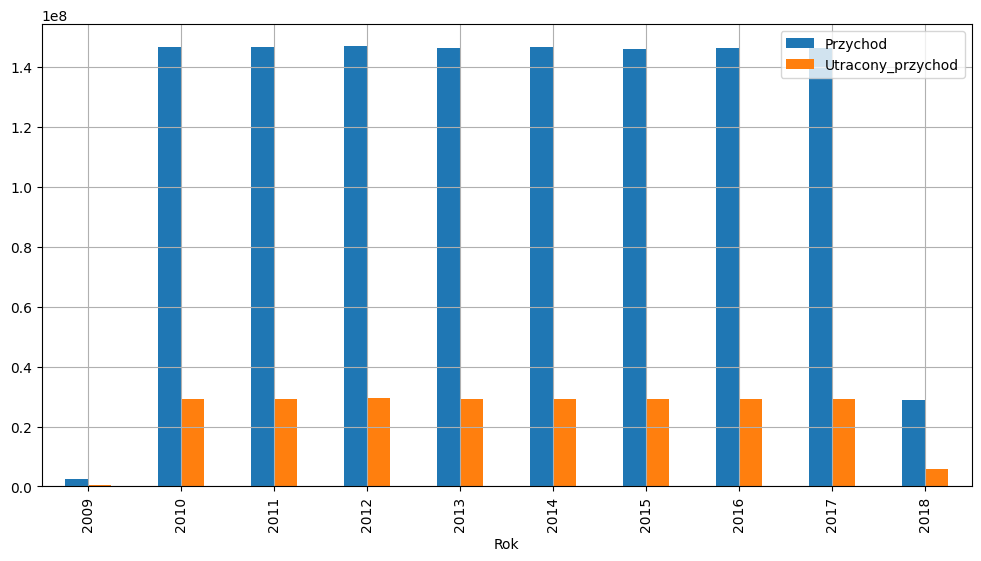

In [59]:
merged_df.groupby(by="Rok")[["Przychod","Utracony_przychod"]].sum().plot(kind="bar",figsize=(12,6),grid=True)

<Axes: xlabel='Produkt'>

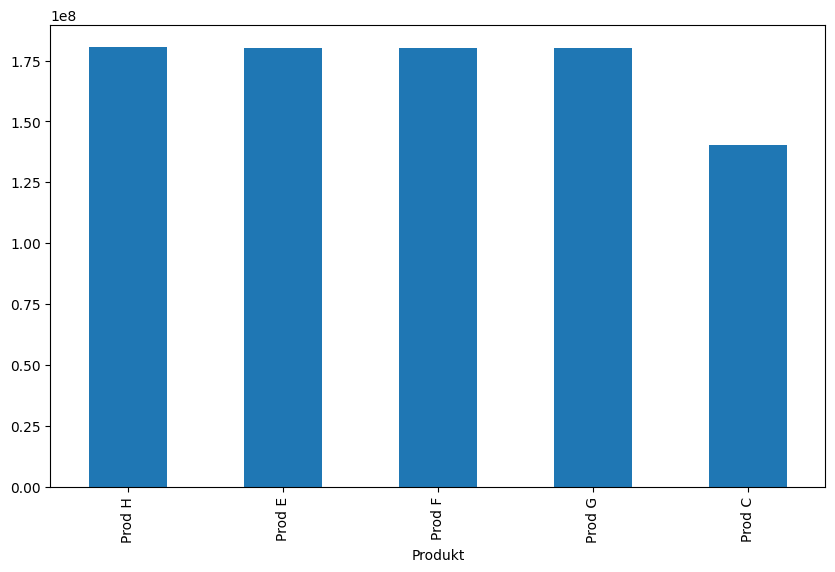

In [60]:
merged_df.groupby(by="Produkt")["Przychod"].sum().nlargest(5).plot(kind="bar",figsize=(10,6))

<Axes: ylabel='Wiek,Produkt'>

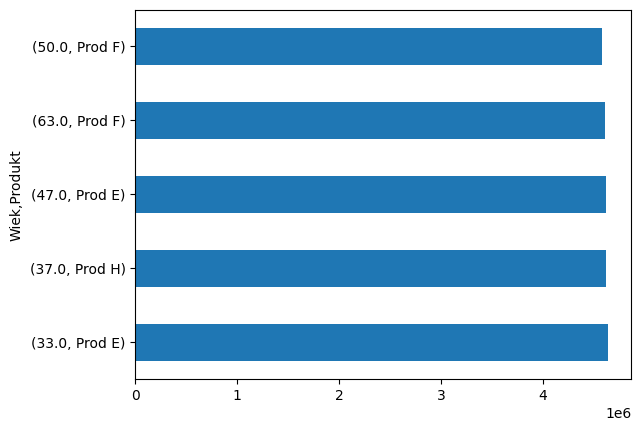

In [61]:
merged_df.groupby(by=["Wiek","Produkt"])["Przychod"].sum().nlargest(5).plot(kind="barh")